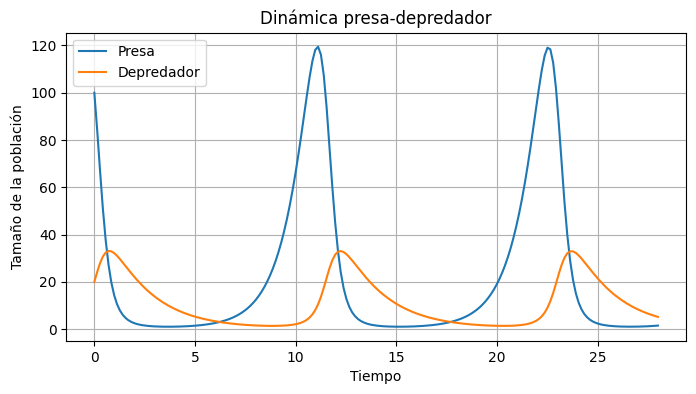

In [ ]:
#Importando las librerías 
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Parámetros
alpha = 1.00
beta = 0.10
delta = 0.02
gamma = 0.50

# Sistema de ecuaciones diferenciales
def lv_system(t, vars):
  x, y = vars
  dxdt = alpha*x - beta*x*y
  dydt = delta*x*y - gamma*y
  return [dxdt, dydt]

# Condiciones iniciales
x0 = 100
y0 = 20
initial_conditions = [x0, y0]

# Intervalo de tiempo para la simulación
time_span = (0, 28)
t_eval = np.linspace(*time_span, 200)

# Resolver el sistema de ecuaciones diferenciales
ref_solution = solve_ivp(lv_system, time_span, initial_conditions, t_eval=t_eval, method='LSODA')

# Extraer la solución para cada variable
t_values = ref_solution.t
x_values = ref_solution.y[0]
y_values = ref_solution.y[1]

# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(t_values, x_values, label='Presa')
plt.plot(t_values, y_values, label='Depredador')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la población')
plt.title('Dinámica presa-depredador')
plt.legend()
plt.grid()
plt.show()

In [5]:
#Convertimos a tensores
t_values = torch.tensor(t_values, dtype=torch.float32).view(-1, 1)
x_values = torch.tensor(x_values, dtype=torch.float32).view(-1, 1)
y_values = torch.tensor(y_values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Datos observacionales
torch.manual_seed(10)

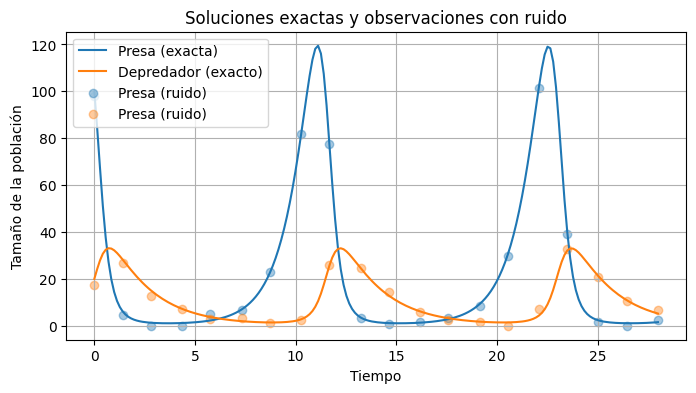

In [7]:
# Número de muestras equiespaciadas
n_obs = 20

# Índices equiespaciados
idx_obs = torch.linspace(0, t_values.shape[0] - 1, steps=n_obs).long()
t_obs = t_values[idx_obs]  # Tiempos observacionales

# Extraemos los valores exactos de x e y en esos tiempos
x_obs = x_values[idx_obs]
y_obs = y_values[idx_obs]

# Añadimos ruido gaussiano (media 0, desviación 0.1)
sigma_x = 0.1 * x_obs.mean()
sigma_y = 0.1 * y_obs.mean()
x_obs_r = torch.clamp(x_obs + sigma_x * torch.randn_like(x_obs), min=0.0)
y_obs_r = torch.clamp(y_obs + sigma_y * torch.randn_like(y_obs), min=0.0)

#visualización
plt.figure(figsize=(8, 4))
plt.plot(t_values, x_values, label='Presa (exacta)')
plt.plot(t_values, y_values, label='Depredador (exacto)')
plt.scatter(t_obs, x_obs_r, label="Presa (ruido)", alpha=0.4)
plt.scatter(t_obs, y_obs_r, label="Presa (ruido)", alpha=0.4)
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la población')
plt.title("Soluciones exactas y observaciones con ruido")
plt.legend()
plt.grid()
plt.show()


In [8]:
# Red neuronal
class FCN(nn.Module):
    def __init__(self, n_input, n_output, n_hidden, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[nn.Linear(n_input, n_hidden),activation()])
        self.fch = nn.Sequential(*[nn.Sequential(*[nn.Linear(n_hidden, n_hidden),activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

Iter 0 | Total=12408.415039 | BC=10386.474609 | Phys=0.021835 | Obs=2021.929810 | alpha=0.999000 | delta=0.099000


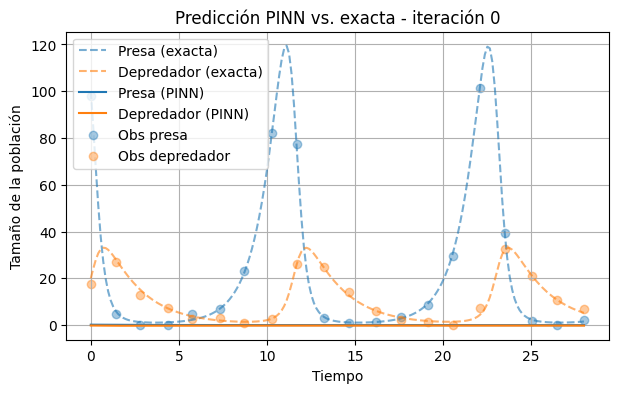

Iter 1000 | Total=5569.955078 | BC=4423.161133 | Phys=46.336411 | Obs=1123.625732 | alpha=1.261962 | delta=0.018487
Iter 2000 | Total=2301.130371 | BC=1689.125488 | Phys=185.851715 | Obs=519.078857 | alpha=1.111211 | delta=0.011219
Iter 3000 | Total=641.891541 | BC=434.534271 | Phys=82.998428 | Obs=165.858078 | alpha=1.261096 | delta=0.011364
Iter 4000 | Total=158.581436 | BC=59.502277 | Phys=45.969780 | Obs=76.094269 | alpha=1.288751 | delta=0.012202
Iter 5000 | Total=70.629364 | BC=4.199687 | Phys=36.150192 | Obs=48.354584 | alpha=1.361199 | delta=0.012652


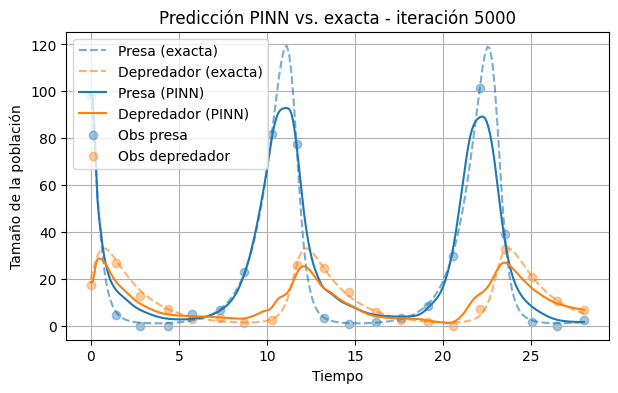

Iter 6000 | Total=51.131844 | BC=1.932959 | Phys=28.016636 | Obs=35.190567 | alpha=1.450408 | delta=0.012898
Iter 7000 | Total=39.928337 | BC=1.643357 | Phys=23.878548 | Obs=26.345707 | alpha=1.493742 | delta=0.013331
Iter 8000 | Total=31.975147 | BC=1.446231 | Phys=21.455929 | Obs=19.800953 | alpha=1.503658 | delta=0.013733
Iter 9000 | Total=14.541580 | BC=0.204597 | Phys=7.897163 | Obs=10.388401 | alpha=1.262469 | delta=0.016208
Iter 10000 | Total=7.875616 | BC=0.092753 | Phys=5.532323 | Obs=5.016702 | alpha=1.154425 | delta=0.017564


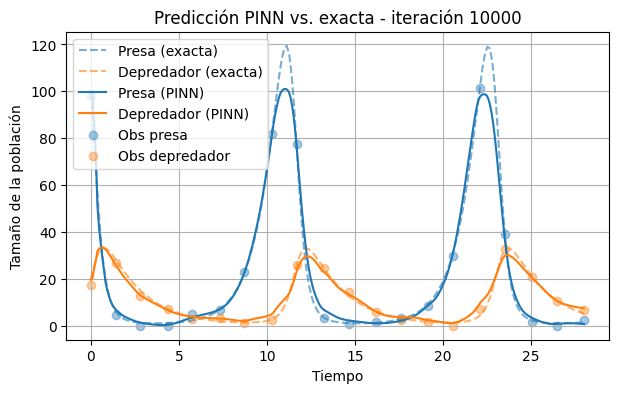

Iter 11000 | Total=5.149417 | BC=0.053500 | Phys=4.301987 | Obs=2.944923 | alpha=1.094788 | delta=0.018654
Iter 12000 | Total=4.090011 | BC=0.033001 | Phys=3.837147 | Obs=2.138437 | alpha=1.063461 | delta=0.019290
Iter 13000 | Total=4.057279 | BC=0.024150 | Phys=3.476840 | Obs=2.294709 | alpha=1.050440 | delta=0.019590
Iter 14000 | Total=3.082058 | BC=0.020990 | Phys=2.991085 | Obs=1.565526 | alpha=1.045002 | delta=0.019649
Iter 15000 | Total=2.796786 | BC=0.018751 | Phys=2.584050 | Obs=1.486010 | alpha=1.041166 | delta=0.019696


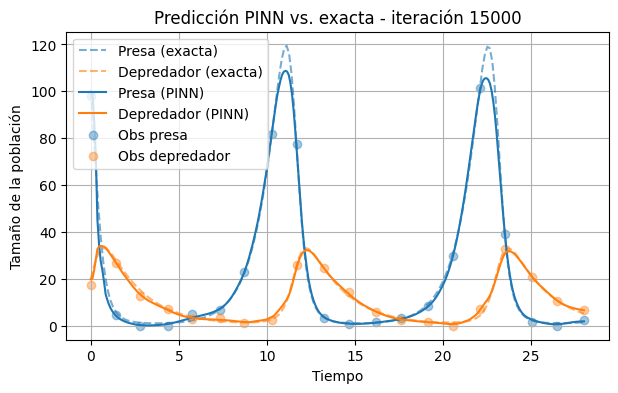

Iter 16000 | Total=2.642651 | BC=0.017714 | Phys=2.155132 | Obs=1.547371 | alpha=1.032840 | delta=0.019830
Iter 17000 | Total=2.430327 | BC=0.016000 | Phys=1.797068 | Obs=1.515793 | alpha=1.026176 | delta=0.019957
Iter 18000 | Total=1.888024 | BC=0.018074 | Phys=1.530373 | Obs=1.104763 | alpha=1.023967 | delta=0.020021
Iter 19000 | Total=1.897900 | BC=0.015531 | Phys=1.338006 | Obs=1.213366 | alpha=1.023116 | delta=0.020008
Iter 20000 | Total=1.833723 | BC=0.018938 | Phys=1.215470 | Obs=1.207050 | alpha=1.022891 | delta=0.019999


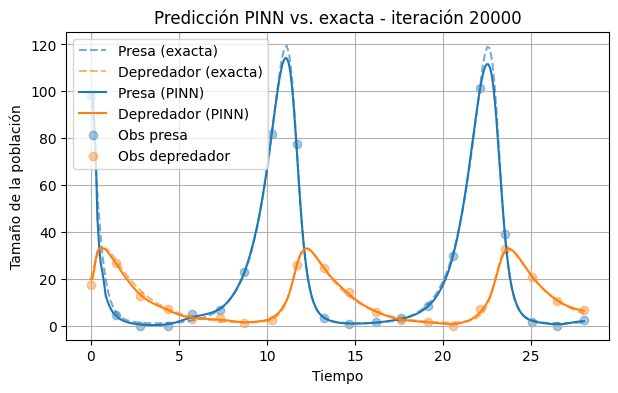

Iter 21000 | Total=1.909150 | BC=0.017329 | Phys=1.137815 | Obs=1.322913 | alpha=1.022366 | delta=0.020045
Iter 22000 | Total=1.554550 | BC=0.018092 | Phys=1.051774 | Obs=1.010571 | alpha=1.022457 | delta=0.019981
Iter 23000 | Total=1.510944 | BC=0.019437 | Phys=1.002081 | Obs=0.990466 | alpha=1.021580 | delta=0.019975
Iter 24000 | Total=1.564734 | BC=0.018825 | Phys=0.972167 | Obs=1.059825 | alpha=1.020826 | delta=0.019961
Iter 25000 | Total=1.526526 | BC=0.020105 | Phys=0.950022 | Obs=1.031411 | alpha=1.019856 | delta=0.019964


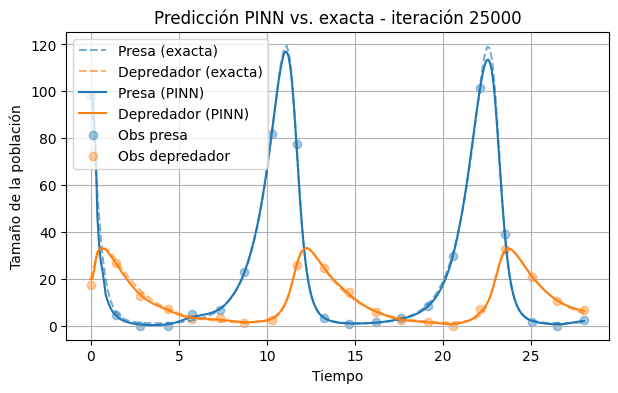

Iter 26000 | Total=1.718962 | BC=0.020062 | Phys=0.937681 | Obs=1.230060 | alpha=1.018415 | delta=0.020021
Iter 27000 | Total=1.433461 | BC=0.020405 | Phys=0.900093 | Obs=0.963010 | alpha=1.017790 | delta=0.019978
Iter 28000 | Total=1.421525 | BC=0.022305 | Phys=0.934152 | Obs=0.932144 | alpha=1.018225 | delta=0.019993
Iter 29000 | Total=1.565294 | BC=0.019972 | Phys=0.881726 | Obs=1.104458 | alpha=1.017751 | delta=0.020010
Iter 30000 | Total=1.671434 | BC=0.020823 | Phys=0.893702 | Obs=1.203759 | alpha=1.018068 | delta=0.019941


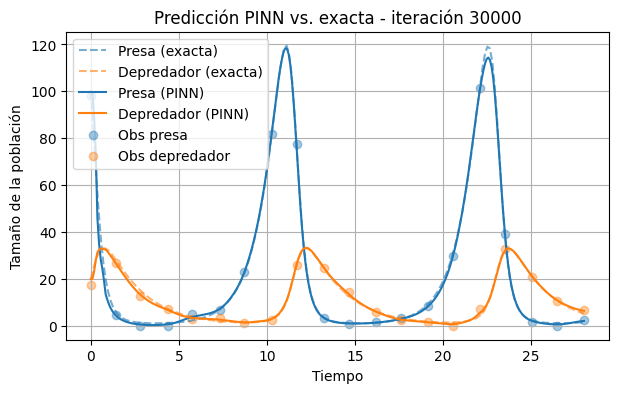

In [9]:
# Inicialización de PINN
pinn = FCN(1, 2, 32, 3)

# Parámetros a estimar (α y δ) como parámetros libres
alpha = torch.nn.Parameter(torch.tensor([1.0], dtype=torch.float32))
delta = torch.nn.Parameter(torch.tensor([0.1], dtype=torch.float32))

# Parámetros fijos
beta = 0.1
gamma = 0.5

# Optimizador
optimizer = torch.optim.Adam(list(pinn.parameters()) + [alpha, delta], lr=1e-3)

# Ponderaciones de pérdida
lambda_bc = 1
lambda_phys = 0.5
lambda_obs = 1

# Tiempo real
T_max = 28
t_boundary = torch.tensor([[0.0]], requires_grad=True)
t_physics = torch.linspace(0, T_max, 200).view(-1, 1).requires_grad_(True)
t_test = torch.linspace(0, T_max, 100).view(-1, 1)

# Observaciones ya definidas: t_obs, x_obs_r, y_obs_r
loss_total_list, loss_bc_list, loss_phys_list, loss_obs_list = [], [], [], []
alpha_list, delta_list = [], []

# Condiciones iniciales
x0_tensor = torch.tensor(x0, dtype=torch.float32)
y0_tensor = torch.tensor(y0, dtype=torch.float32)

# Entrenamiento
for i in range(30001):
    optimizer.zero_grad()

    # Condiciones iniciales
    pred_boundary = pinn(t_boundary)
    x0_pred, y0_pred = pred_boundary[0]
    loss_bc = (x0_pred - x0_tensor)**2 + (y0_pred - y0_tensor)**2

    # Física
    pred_physics = pinn(t_physics)
    x_pred, y_pred = pred_physics[:, 0:1], pred_physics[:, 1:2]

    dx_dt = torch.autograd.grad(x_pred, t_physics, torch.ones_like(x_pred), create_graph=True)[0]
    dy_dt = torch.autograd.grad(y_pred, t_physics, torch.ones_like(y_pred), create_graph=True)[0]

    # Residuos ODE
    loss_ode_x = dx_dt - (alpha * x_pred - beta * x_pred * y_pred)
    loss_ode_y = dy_dt - (delta * x_pred * y_pred - gamma * y_pred)
    loss_phys = torch.mean(loss_ode_x**2) + torch.mean(loss_ode_y**2)

    # Observaciones
    pred_obs = pinn(t_obs)
    x_pred_obs, y_pred_obs = pred_obs[:, 0:1], pred_obs[:, 1:2]
    loss_obs = torch.mean((x_pred_obs - x_obs_r)**2) + torch.mean((y_pred_obs - y_obs_r)**2)

    # Total
    loss = lambda_bc*loss_bc + lambda_phys*loss_phys + lambda_obs*loss_obs
    loss.backward()
    optimizer.step()

    # Logs
    loss_total_list.append(loss.item())
    loss_bc_list.append(loss_bc.item())
    loss_phys_list.append(loss_phys.item())
    loss_obs_list.append(loss_obs.item())
    alpha_list.append(alpha.item())
    delta_list.append(delta.item())

    if i % 1000 == 0:
        print(f"Iter {i} | Total={loss.item():.6f} | BC={loss_bc.item():.6f} "
              f"| Phys={loss_phys.item():.6f} | Obs={loss_obs.item():.6f} "
              f"| alpha={alpha.item():.6f} | delta={delta.item():.6f}")

    if i % 5000 == 0:
        with torch.no_grad():
            t_test = torch.linspace(0, T_max, 300).view(-1, 1)
            pred_test = pinn(t_test)
            x_pred_test = pred_test[:, 0].numpy()
            y_pred_test = pred_test[:, 1].numpy()

            plt.figure(figsize=(7,4))
            plt.plot(t_values.numpy(), x_values.numpy(), '--', color='tab:blue', alpha=0.6, label="Presa (exacta)")
            plt.plot(t_values.numpy(), y_values.numpy(), '--', color='tab:orange', alpha=0.6, label="Depredador (exacta)")
            plt.plot(t_test.numpy(), x_pred_test, color='tab:blue', label="Presa (PINN)")
            plt.plot(t_test.numpy(), y_pred_test, color='tab:orange', label="Depredador (PINN)")
            plt.scatter(t_obs.numpy(), x_obs_r.numpy(), color='tab:blue', alpha=0.4, label='Obs presa')
            plt.scatter(t_obs.numpy(), y_obs_r.numpy(), color='tab:orange', alpha=0.4, label='Obs depredador')
            plt.xlabel("Tiempo")
            plt.ylabel("Tamaño de la población")
            plt.title(f"Predicción PINN vs. exacta - iteración {i}")
            plt.legend()
            plt.grid(True)
            plt.show()


In [13]:
import pandas as pd

data = {'Variable': ['alpha', 'delta'],'Valor real': [1.00, 0.02],'Valor estimado': [alpha.item(), delta.item()]}

df = pd.DataFrame(data)
pd.options.display.float_format = '{:,.6f}'.format
display(df.style.hide(axis="index"))

Variable,Valor real,Valor estimado
alpha,1.000000,1.018068
delta,0.020000,0.019941


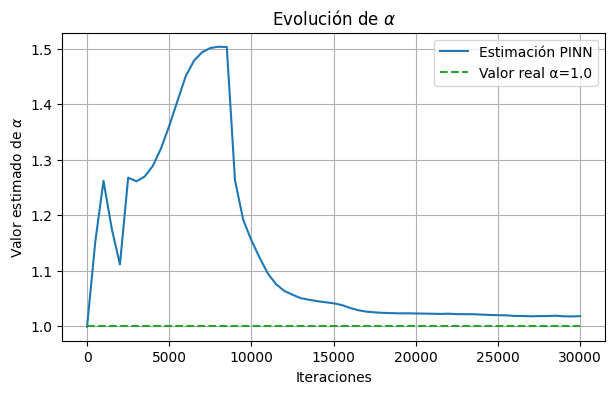

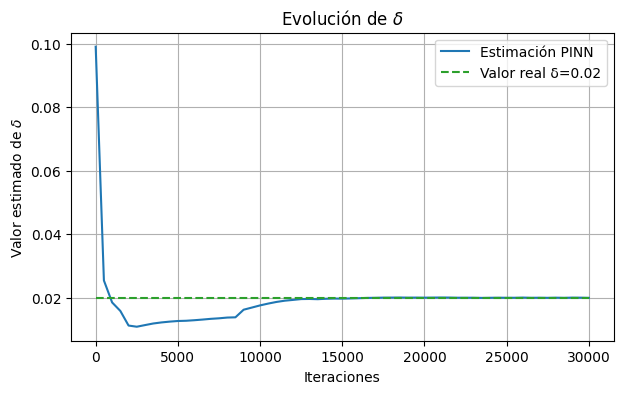

In [11]:
# Iteraciones
pasos = np.arange(len(alpha_list))
pasos_filtrados = pasos[::500]

alpha_filtrados = [alpha_list[i] for i in pasos_filtrados]
delta_filtrados = [delta_list[i] for i in pasos_filtrados]

# Curva de α
plt.figure(figsize=(7,4))
plt.plot(pasos_filtrados, alpha_filtrados, label="Estimación PINN", color="tab:blue")
plt.hlines(1.0, pasos_filtrados[0], pasos_filtrados[-1],
           label="Valor real α=1.0", color="tab:green", linestyles="--")
plt.title(r"Evolución de $\alpha$")
plt.xlabel("Iteraciones")
plt.ylabel(r"Valor estimado de $\alpha$")
plt.legend()
plt.grid(True)
plt.show()

# Curva de δ
plt.figure(figsize=(7,4))
plt.plot(pasos_filtrados, delta_filtrados, label="Estimación PINN", color="tab:blue")
plt.hlines(0.02, pasos_filtrados[0], pasos_filtrados[-1],   # CORREGIDO
           label="Valor real δ=0.02", color="tab:green", linestyles="--")
plt.title(r"Evolución de $\delta$")
plt.xlabel("Iteraciones")
plt.ylabel(r"Valor estimado de $\delta$")
plt.legend()
plt.grid(True)
plt.show()

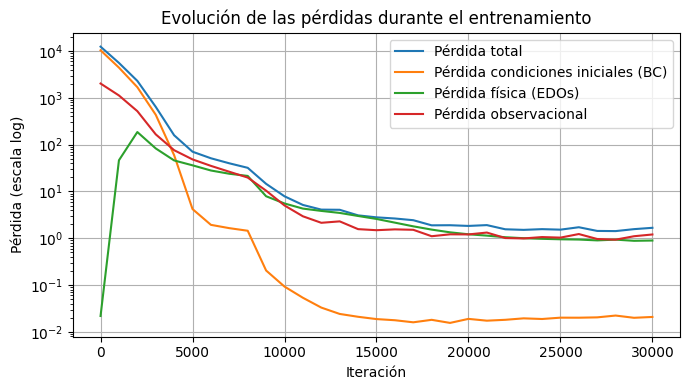

In [12]:
# Índices de iteración cada 1000 pasos
iters = list(range(0, len(loss_total_list), 1000))

# Submuestreo de las listas
loss_total_sub = loss_total_list[::1000]
loss_bc_sub = loss_bc_list[::1000]
loss_phys_sub = loss_phys_list[::1000]
loss_obs_sub = loss_obs_list[::1000]

# Gráfica de pérdidas
plt.figure(figsize=(7, 4))
plt.plot(iters, loss_total_sub, label='Pérdida total')
plt.plot(iters,loss_bc_sub, label='Pérdida condiciones iniciales (BC)')
plt.plot(iters,loss_phys_sub, label='Pérdida física (EDOs)')
plt.plot(iters,loss_obs_sub, label='Pérdida observacional')
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Pérdida (escala log)')
plt.title('Evolución de las pérdidas durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()